<a href="https://colab.research.google.com/github/mario-rot/Introduction-to-Human-Language-Technology/blob/main/Session7_LaurenTucker_MarioRosas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab session 7 (Word Sequences) - ILTH

**Students:** Lauren Tucker & Mario Rosas !!!

## Loading Data

In [ ]:
%%shell
git clone https://github.com/mario-rot/Introduction-to-Human-Language-Technology.git
cd 'Introduction-to-Human-Language-Technology'
mv 'Complementary Material' /content/

pip install svgling

Cloning into 'Introduction-to-Human-Language-Technology'...
remote: Enumerating objects: 864, done.
remote: Counting objects: 100% (864/864), done.
remote: Compressing objects: 100% (792/792), done.
remote: Total 864 (delta 117), reused 788 (delta 67), pack-reused 0
Receiving objects: 100% (864/864), 2.27 MiB | 14.46 MiB/s, done.
Resolving deltas: 100% (117/117), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 3.0 MB/s 


In [ ]:
import pandas as pd
dt = pd.read_csv('Complementary Material/test-gold/STS.input.SMTeuroparl.txt',sep='\t',header=None)
dt['gs'] = pd.read_csv('Complementary Material/test-gold/STS.gs.SMTeuroparl.txt',sep='\t',header=None)

# Excercise

In [ ]:
from scipy.stats import pearsonr
import numpy as np
import string

from nltk.metrics import jaccard_distance
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')

import spacy

pearson_res = {}

def remove_signs(wrd):
  wrd = list(wrd)
  wrd = [word for word in wrd if not any(caracter in signs for caracter in word)]
  wrd = ''.join(wrd)
  return wrd

def clean(corpus, stopwords, minwords_len, signs):
  #  corpus = corpus.split(' ')
   corpus = [word.lower() for word in corpus]
   corpus = [word if not any(caracter in signs for caracter in word) else remove_signs(word) for word in corpus]
   corpus = [word for word in corpus if word not in stopwords and word.isalpha()]
   corpus = [word for word in corpus if len(word) > minwords_len]
   return corpus

# corpus = list(gutenberg.words('blake-poems.txt'))
stopwords=set(nltk.corpus.stopwords.words('english'))
signs = string.punctuation
minwords_len = 2

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Trying NLTK Named Entities

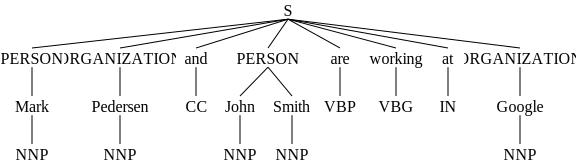

In [ ]:
token = nltk.word_tokenize('Mark Pedersen and John Smith are working at Google')
x = nltk.pos_tag(token)
res = nltk.ne_chunk(x)

res

In [ ]:
def get_nes(sentence):
  token = nltk.word_tokenize(sentence)
  x = nltk.pos_tag(token)
  res = nltk.ne_chunk(x)
  named_entities = []
  for item in res:
    try: 
      ne = item.label()
      named_entities.append(ne)
    except:
      named_entities.append(item[0])

  if named_entities != []:
    return named_entities

def compute_metric(metric, elements): # Fenction to calculate Jaccard Distance
  if metric == 'jaccard':
      res = jaccard_distance(set(clean(get_nes(elements[0]), stopwords, minwords_len, signs)),
                              set(clean(get_nes(elements[1]), stopwords, minwords_len, signs))) 
      return res

dt['jaccard NLTK'] = ""

for i in range(len(dt)): # Iterating to get Jaccard distances over each column of the dataframe
  dt['jaccard NLTK'][i] = np.float64(compute_metric('jaccard',[dt.iloc[i][0],dt.iloc[i][1]]))*10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
dt

,0,1,gs,jaccard NLTK
0,The leaders have now been given a new chance a...,The leaders benefit aujourd' hui of a new luck...,4.500,6.666667
1,Amendment No 7 proposes certain changes in the...,Amendment No 7 is proposing certain changes in...,5.000,2.857143
2,Let me remind you that our allies include ferv...,I would like to remind you that among our alli...,4.250,7.272727
3,The vote will take place today at 5.30 p.m.,The vote will take place at 5.30pm,4.500,2.5
4,"The fishermen are inactive, tired and disappoi...","The fishermen are inactive, tired and disappoi...",5.000,0.0
...,...,...,...,...
454,It is our job to continue to support Latvia wi...,It is of our duty of continue to support the c...,5.000,6.0
455,The vote will take place today at 5.30 p.m.,Vote will take place at 17 h 30.,4.750,6.0
456,Neither was there a qualified majority within ...,There was no qualified majority in this Parlia...,5.000,5.0
457,Let me remind you that our allies include ferv...,"I hold you recall that our allies, there are e...",4.000,8.0


In [ ]:
pearson_res['jaccard NLTK'] = pearsonr(dt['gs'], 1-dt['jaccard NLTK']) # Calculating the pearson correlation between GS results and 1-Jaccard calculated data with lesk algorithm applied
pearson_res['jaccard NLTK']

(0.4521749497617128, 1.6361767570614084e-24)

## Trying Spacy

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")


def do_spacy(sentence):
  doc = nlp(sentence)
  with doc.retokenize() as retokenizer:
      tokens = [token for token in doc]
      for ent in doc.ents:
          retokenizer.merge(doc[ent.start:ent.end], 
                            attrs={"LEMMA": " ".join([tokens[i].text for i in range(ent.start, ent.end)])})
  res = []
  for ent in doc:
    if ent.ent_type_ != '':
      res.append(ent.ent_type_)
      # pass
    else:
      res.append(ent.text) 
    # res.append(ent.text)
  return res

def compute_metric(metric, elements): # Fenction to calculate Jaccard Distance
    if metric == 'jaccard':
      print(set(clean(do_spacy(elements[0]), stopwords, minwords_len, signs)),
                              set(clean(do_spacy(elements[1]), stopwords, minwords_len, signs)),'\n ---------')
      res = jaccard_distance(set(clean(do_spacy(elements[0]), stopwords, minwords_len, signs)),
                              set(clean(do_spacy(elements[1]), stopwords, minwords_len, signs)))
      return res

dt['jaccard Spacy'] = ""

for i in range(len(dt)): # Iterating to get Jaccard distances over each column of the dataframe
    dt['jaccard Spacy'][i] = np.float64(compute_metric('jaccard',[dt.iloc[i][0],dt.iloc[i][1]]))*10


{'chance', 'new', 'let', 'leaders', 'hope', 'given', 'seize'} {'new', 'therefore', 'let', 'leaders', 'aujourd', 'luck', 'benefit', 'seize', 'hui'} 
 ---------
{'proposes', 'references', 'amendment', 'changes', 'certain', 'paragraphs'} {'references', 'amendment', 'changes', 'proposing', 'certain', 'paragraphs'} 
 ---------
{'allies', 'supporters', 'fervent', 'let', 'include', 'tax', 'remind'} {'allies', 'strong', 'among', 'remind', 'tax', 'like', 'would'} 
 ---------
{'time', 'place', 'date', 'vote', 'take'} {'vote', 'place', 'take'} 
 ---------
{'fishermen', 'tired', 'disappointed', 'inactive'} {'fishermen', 'tired', 'disappointed', 'inactive'} 
 ---------
{'qualified', 'org', 'law', 'majority', 'revert', 'neither', 'within'} {'org', 'law', 'majority', 'voting', 'back'} 
 ---------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


{'countries', 'power', 'expense', 'increases', 'small', 'big'} {'countries', 'augmenting', 'detriment', 'potency', 'effect', 'babies', 'big'} 
 ---------
{'fishermen', 'tired', 'disappointed', 'inactive'} {'fishers', 'tired', 'disappointed', 'inactive'} 
 ---------
{'chance', 'new', 'let', 'leaders', 'hope', 'given', 'seize'} {'chance', 'therefore', 'let', 'leaders', 'another', 'take'} 
 ---------
{'time', 'place', 'date', 'vote', 'take'} {'vote', 'place', 'date', 'take'} 
 ---------
{'must', 'balance', 'whole'} {'must', 'balance', 'body'} 
 ---------
{'pontificate', 'citizens', 'often', 'representatives', 'loc'} {'citizens', 'often', 'proud', 'represent', 'loc'} 
 ---------
{'org', 'adopted', 'resolution', 'legislative'} {'org', 'resolution', 'adopts', 'legislative'} 
 ---------
{'chance', 'new', 'let', 'leaders', 'hope', 'given', 'seize'} {'chance', 'grab', 'new', 'therefore', 'let', 'leaders', 'aujourd', 'benefit', 'hui'} 
 ---------
{'attends', 'faithfully', 'members', 'quite', 'on

In [ ]:
pearson_res['jaccard Spacy'] = pearsonr(dt['gs'], 1-dt['jaccard Spacy']) # Calculating the pearson correlation between GS results and 1-Jaccard calculated data with lesk algorithm applied
pearson_res['jaccard Spacy']

(0.4616215923358601, 1.3253847890117101e-25)

## General Results

In [ ]:
pearson_res

{'jaccard NLTK': (0.4521749497617128, 1.6361767570614084e-24),
 'jaccard Spacy': (0.4616215923358601, 1.3253847890117101e-25)}

# Conclusion

In this lab, we first used NLTK to find named entities and use these to compare sentence similarities, resulting in a Pearson correlation of:

*0.4521749497617128*

We then also used SpaCy to find named entities and compare the sentence similarities, which resulted in a Pearson correlation of:

*0.4616215923358601*

Comparing these two techniques, SpaCy has slightly better performance than NLTK. This is likely because with SpaCy we have the ability to combine like named entities into one. For example "Mark" "Pederson" in NLTK becomes "Mark Pederson" with SpaCy, identifying the whole combination as one entity. 


For reference for further analysis, the Pearson correlation for Lab 3 was:

*0.48102317341708245*

This shows that our performance using NLTK and SpaCy were both lower than when directly comparing lemmas of sentences. One reason for this may be that most of the words in our dataset do not have named entities. This is particularly troublesome when handling verbs -- since we are not able to compare named entities, we must compare the words directly, and the verbs may have different tenses, resulting in a lower similarity score.

Another issue with using named entities to compare sentences, is that one sentence in a pair may have named entities while the other does not. This results in noise when calculating the Jaccard distance since no direct comparison can then be made between a given pair of named entities.


Given this information, we conclude that named entities can be useful when comparing sentences when both sentences have named entities to compare. However, when name entities cannot be extracted from sentences, or can only be extracted from one sentence of a pair, it does not result in any better performance than when named entities are not used for comparison. We predict that combining named entities with other techniques may result in better performance, but this remains to be tested.







